In [1]:
import pandas as pd
import geopandas as gpd
import requests
from shapely.geometry import shape, Point
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import urllib.request, json
import requests
import urllib.parse
import datetime
import os
import dask.dataframe as dd
import calendar
from datetime import datetime, timedelta

from geopandas.tools import sjoin

import warnings
warnings.filterwarnings('ignore')

In [2]:
nta_url = 'https://data.cityofnewyork.us/resource/q2z5-ai38.json'

query = (nta_url+'?'
        "$select=*"
        "&$limit=10000")
query = query.replace(" ", "%20")
response = urllib.request.urlopen(query)
data = json.loads(response.read())


for d in data:
    d['geometry'] = shape(d['the_geom'])

#store in a geodataframe
nta = gpd.GeoDataFrame(data, geometry = 'geometry', crs = 'EPSG: 4326')
nta = nta.drop(columns = ['the_geom'])
nta.head()

,boro_code,boro_name,county_fips,ntacode,ntaname,shape_leng,shape_area,geometry
0,4,Queens,081,QN08,St. Albans,45401.316803,77412747.847,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ..."
1,2,Bronx,005,BX28,Van Cortlandt Village,21945.719299,25666124.5948,"MULTIPOLYGON (((-73.88705 40.88435, -73.88705 ..."
2,4,Queens,081,QN55,South Ozone Park,36708.1693055,82461393.7368,"MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ..."
3,3,Brooklyn,047,BK40,Windsor Terrace,19033.6720656,14041667.99,"MULTIPOLYGON (((-73.98017 40.66115, -73.98021 ..."
4,3,Brooklyn,047,BK50,Canarsie,43703.6096661,82089678.6389,"MULTIPOLYGON (((-73.88834 40.64671, -73.88835 ..."


<AxesSubplot:>

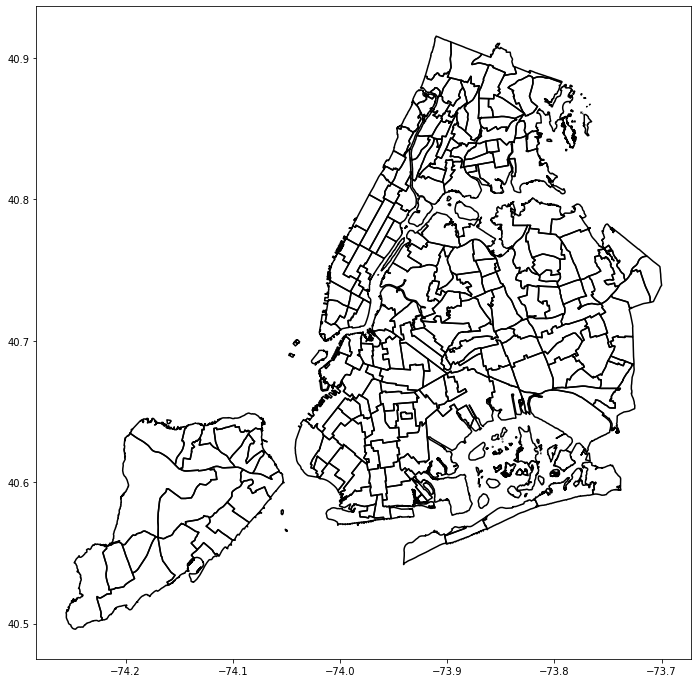

In [3]:
nta_boundary = nta.boundary

# Plot the NTA boundaries
fig, ax = plt.subplots(figsize=(12,12))
nta_boundary.plot(edgecolor='black', ax=ax)

In [4]:
data = pd.read_csv('/Users/ananyarajesh/Downloads/applied_data_science_final_project-main 4/Data/predictions.csv')
data

,ntacode,2010/1/1,2010/10/1,2010/11/1,2010/12/1,2010/2/1,2010/3/1,2010/4/1,2010/5/1,2010/6/1,...,2022/11/1,2022/12/1,2022/2/1,2022/3/1,2022/4/1,2022/5/1,2022/6/1,2022/7/1,2022/8/1,2022/9/1
0,BK09,697798.551322,428324.203195,990863.745577,752210.790906,780888.990184,725325.215211,828905.269607,816189.519086,796520.710253,...,1.228884e+06,1.255000e+06,1.238700e+06,1.165788e+06,1.347127e+06,1.381361e+06,1.267445e+06,9.268022e+05,1.135748e+06,1.341451e+06
1,BK17,389336.692272,449847.513319,409581.327280,239290.293005,417967.157730,284942.093911,305491.312927,395265.002622,420692.785295,...,6.221160e+05,5.822242e+05,5.656279e+05,6.144135e+05,5.724939e+05,5.995400e+05,5.751300e+05,5.783108e+05,5.987075e+05,5.636817e+05
2,BK19,262508.288159,271471.248695,357485.392224,324971.026296,339428.749314,279222.970747,288543.297386,218176.110973,368197.036120,...,3.951287e+05,5.178967e+05,5.041368e+05,5.091287e+05,4.152583e+05,5.073173e+05,4.195434e+05,3.616919e+05,4.208639e+05,4.069523e+05
3,BK21,180803.344813,185621.934929,137992.375330,33638.472539,136039.696197,131613.866827,114624.828250,-28505.261368,114089.360797,...,4.671691e+05,4.919108e+05,2.807572e+05,3.771568e+05,4.250000e+05,2.843346e+05,2.811766e+05,4.533403e+05,4.012630e+05,4.259510e+05
4,BK23,314944.671921,282520.963751,507523.265860,455726.430199,384831.921831,393066.173240,454839.059328,385892.091185,412394.365034,...,4.364816e+05,2.725462e+05,4.035507e+05,4.795461e+05,4.123978e+05,5.325996e+05,5.979214e+05,4.683692e+05,5.309558e+05,4.646084e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,QN68,547945.512084,668170.944282,696939.241260,585039.090952,566623.970696,520503.532445,605738.960265,649949.384766,650870.974570,...,9.069475e+05,9.989851e+05,1.008079e+06,1.050962e+06,1.020949e+06,9.189244e+05,1.062127e+06,1.096585e+06,1.067036e+06,9.223340e+05
116,QN70,363098.642111,443288.558458,594044.852574,493169.202135,499004.176693,520050.043606,475419.644330,472137.682220,446653.696215,...,9.374403e+05,8.856330e+05,8.387971e+05,8.441486e+05,8.676836e+05,8.468908e+05,8.630029e+05,8.231178e+05,8.137948e+05,8.671029e+05
117,QN71,488027.985832,443306.324167,487120.129759,436296.537586,460575.494243,534753.098445,505767.275833,476159.236922,528367.153405,...,7.491917e+05,7.530381e+05,9.227654e+05,8.070604e+05,8.134910e+05,8.705374e+05,8.926540e+05,8.679671e+05,8.698083e+05,8.444692e+05
118,QN72,487260.741682,538455.631528,422890.781375,483930.819041,477900.374076,460873.715904,552995.345938,528441.165304,488565.803048,...,7.962115e+05,7.481703e+05,8.225689e+05,8.211554e+05,9.622388e+05,8.596846e+05,8.621892e+05,8.096350e+05,7.938350e+05,7.886434e+05


In [5]:
data.columns

Index(['ntacode', '2010/1/1', '2010/10/1', '2010/11/1', '2010/12/1',
       '2010/2/1', '2010/3/1', '2010/4/1', '2010/5/1', '2010/6/1',
       ...
       '2022/11/1', '2022/12/1', '2022/2/1', '2022/3/1', '2022/4/1',
       '2022/5/1', '2022/6/1', '2022/7/1', '2022/8/1', '2022/9/1'],
      dtype='object', length=157)

In [6]:
nta['ntacode'].unique()

array(['QN08', 'BX28', 'QN55', 'BK40', 'BK50', 'BX41', 'QN26', 'BK68',
       'BK79', 'QN38', 'QN52', 'BK44', 'QN01', 'BX98', 'QN07', 'QN48',
       'BK77', 'BK41', 'BK75', 'QN33', 'QN44', 'MN06', 'BX07', 'QN62',
       'SI11', 'QN15', 'SI08', 'BX10', 'BX33', 'QN37', 'BX13', 'BK81',
       'BK85', 'QN35', 'SI37', 'QN23', 'QN12', 'QN46', 'QN50', 'BK91',
       'BK95', 'QN66', 'QN41', 'BK09', 'QN54', 'SI12', 'SI28', 'BX43',
       'BK64', 'BX55', 'QN47', 'QN49', 'BK63', 'SI14', 'BX06', 'BK21',
       'BK26', 'BX22', 'QN19', 'BK34', 'BX03', 'BX31', 'QN17', 'QN60',
       'BX29', 'BX30', 'BK27', 'BX05', 'QN22', 'QN51', 'QN02', 'QN76',
       'BX35', 'QN28', 'QN63', 'BK88', 'MN19', 'MN35', 'QN43', 'QN61',
       'MN04', 'MN50', 'BK58', 'BK96', 'MN20', 'BK90', 'BK73', 'BX59',
       'QN10', 'BK17', 'BX26', 'MN23', 'SI45', 'SI36', 'MN36', 'MN34',
       'MN27', 'MN21', 'MN31', 'MN40', 'MN22', 'MN33', 'BK33', 'BK61',
       'BK69', 'QN25', 'BK30', 'BK31', 'BX01', 'BX40', 'BX09', 'BX49',
      

In [7]:
data['ntacode'].unique()

array(['BK09', 'BK17', 'BK19', 'BK21', 'BK23', 'BK25', 'BK26', 'BK27',
       'BK28', 'BK29', 'BK30', 'BK31', 'BK33', 'BK34', 'BK35', 'BK37',
       'BK38', 'BK40', 'BK41', 'BK43', 'BK44', 'BK45', 'BK50', 'BK58',
       'BK61', 'BK63', 'BK64', 'BK68', 'BK69', 'BK72', 'BK73', 'BK75',
       'BK76', 'BK77', 'BK78', 'BK79', 'BK81', 'BK82', 'BK83', 'BK85',
       'BK88', 'BK90', 'BK91', 'BK93', 'BK95', 'BX08', 'BX22', 'BX29',
       'BX37', 'BX44', 'BX46', 'BX52', 'BX55', 'BX62', 'MN03', 'MN11',
       'MN12', 'MN14', 'MN15', 'MN17', 'MN19', 'MN20', 'MN21', 'MN22',
       'MN28', 'MN32', 'MN35', 'MN36', 'MN40', 'QN01', 'QN02', 'QN03',
       'QN05', 'QN06', 'QN07', 'QN08', 'QN10', 'QN12', 'QN15', 'QN17',
       'QN18', 'QN19', 'QN20', 'QN21', 'QN22', 'QN23', 'QN25', 'QN26',
       'QN28', 'QN29', 'QN30', 'QN31', 'QN33', 'QN34', 'QN35', 'QN37',
       'QN42', 'QN43', 'QN44', 'QN46', 'QN47', 'QN48', 'QN49', 'QN50',
       'QN51', 'QN52', 'QN53', 'QN55', 'QN56', 'QN57', 'QN60', 'QN61',
      

In [8]:
df = pd.merge(nta, data, on='ntacode', how='inner')

In [9]:
df

,boro_code,boro_name,county_fips,ntacode,ntaname,shape_leng,shape_area,geometry,2010/1/1,2010/10/1,...,2022/11/1,2022/12/1,2022/2/1,2022/3/1,2022/4/1,2022/5/1,2022/6/1,2022/7/1,2022/8/1,2022/9/1
0,4,Queens,081,QN08,St. Albans,45401.316803,77412747.847,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...",285000.000000,300603.780352,...,5.372138e+05,566964.779402,5.435362e+05,5.211491e+05,5.539894e+05,6.803706e+05,5.531690e+05,6.124989e+05,5.946294e+05,5.697673e+05
1,4,Queens,081,QN55,South Ozone Park,36708.1693055,82461393.7368,"MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ...",369641.851090,335157.585605,...,5.850884e+05,636989.668143,5.502279e+05,6.134518e+05,6.094437e+05,6.481862e+05,7.285171e+05,7.080453e+05,7.097835e+05,6.478011e+05
2,3,Brooklyn,047,BK40,Windsor Terrace,19033.6720656,14041667.99,"MULTIPOLYGON (((-73.98017 40.66115, -73.98021 ...",240292.963894,322082.018988,...,4.568591e+05,729282.895955,4.860369e+05,7.394856e+05,7.508517e+05,7.790970e+05,8.530287e+05,1.110176e+06,8.837943e+05,1.709477e+05
3,3,Brooklyn,047,BK50,Canarsie,43703.6096661,82089678.6389,"MULTIPOLYGON (((-73.88834 40.64671, -73.88835 ...",439244.513750,371624.810636,...,5.855455e+05,663757.535861,5.381241e+05,5.651693e+05,5.864903e+05,6.433239e+05,6.680415e+05,7.328880e+05,6.989888e+05,6.169496e+05
4,4,Queens,081,QN26,North Corona,18429.5400774,18003888.327,"MULTIPOLYGON (((-73.85450 40.75828, -73.85421 ...",413636.278938,350162.019177,...,4.421619e+05,470789.929400,5.398934e+05,3.247390e+05,2.287045e+05,5.170547e+05,6.635553e+05,6.491509e+05,6.089039e+05,6.201261e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,Manhattan,061,MN28,Lower East Side,26518.5122812,23299597.1538,"MULTIPOLYGON (((-73.98237 40.70554, -73.98246 ...",612610.785013,567846.908673,...,1.012854e+06,940709.552912,1.038903e+06,1.190459e+06,1.304293e+06,1.365125e+06,1.342157e+06,1.280140e+06,1.084888e+06,1.159295e+06
116,3,Brooklyn,047,BK35,Stuyvesant Heights,28239.0853295,31407114.0944,"MULTIPOLYGON (((-73.91741 40.68403, -73.91727 ...",543772.842442,540577.794869,...,9.275712e+05,767705.846598,8.983358e+05,1.113401e+06,9.565022e+05,1.130273e+06,1.101745e+06,1.016215e+06,8.998800e+05,1.152253e+06
117,3,Brooklyn,047,BK78,Bushwick South,40735.7458884,40169273.8854,"MULTIPOLYGON (((-73.93230 40.70775, -73.93392 ...",399293.554190,429849.302255,...,8.776556e+05,820738.677280,8.625790e+05,8.949619e+05,9.611497e+05,9.753693e+05,1.197836e+06,1.020013e+06,1.014370e+06,1.034122e+06
118,3,Brooklyn,047,BK83,Cypress Hills-City Line,35564.0581876,27609541.0302,"MULTIPOLYGON (((-73.86335 40.67935, -73.86331 ...",287491.540137,296113.570139,...,5.720260e+05,573751.095718,6.941172e+05,5.871835e+05,5.724182e+05,6.101051e+05,6.355660e+05,7.161797e+05,6.336353e+05,6.866517e+05


In [10]:
df.columns

Index(['boro_code', 'boro_name', 'county_fips', 'ntacode', 'ntaname',
       'shape_leng', 'shape_area', 'geometry', '2010/1/1', '2010/10/1',
       ...
       '2022/11/1', '2022/12/1', '2022/2/1', '2022/3/1', '2022/4/1',
       '2022/5/1', '2022/6/1', '2022/7/1', '2022/8/1', '2022/9/1'],
      dtype='object', length=164)

In [11]:
columns = df.iloc[:, 8:].columns.tolist()

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalize values
scaler = StandardScaler()
df[columns] = scaler.fit_transform(df[columns])

# Choose number of clusters
n_clusters = 5

# Fit K-Means algorithm
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df[columns])

# Assign each observation to a cluster
df['Cluster'] = kmeans.predict(df[columns])

In [13]:
df

,boro_code,boro_name,county_fips,ntacode,ntaname,shape_leng,shape_area,geometry,2010/1/1,2010/10/1,...,2022/12/1,2022/2/1,2022/3/1,2022/4/1,2022/5/1,2022/6/1,2022/7/1,2022/8/1,2022/9/1,Cluster
0,4,Queens,081,QN08,St. Albans,45401.316803,77412747.847,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...",-0.735560,-0.611739,...,-0.449050,-0.574509,-0.665315,-0.502458,-0.244594,-0.634840,-0.503150,-0.492518,-0.528012,2
1,4,Queens,081,QN55,South Ozone Park,36708.1693055,82461393.7368,"MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ...",-0.349190,-0.455337,...,-0.226825,-0.549140,-0.351943,-0.336211,-0.342072,-0.096942,-0.182094,-0.110208,-0.278318,2
2,3,Brooklyn,047,BK40,Windsor Terrace,19033.6720656,14041667.99,"MULTIPOLYGON (((-73.98017 40.66115, -73.98021 ...",-0.939637,-0.514521,...,0.066069,-0.792498,0.075949,0.087717,0.054423,0.285010,1.169147,0.467506,-1.804164,2
3,3,Brooklyn,047,BK50,Canarsie,43703.6096661,82089678.6389,"MULTIPOLYGON (((-73.88834 40.64671, -73.88835 ...",-0.031471,-0.290274,...,-0.141876,-0.595027,-0.515864,-0.405023,-0.356799,-0.282457,-0.098618,-0.146046,-0.377037,2
4,4,Queens,081,QN26,North Corona,18429.5400774,18003888.327,"MULTIPOLYGON (((-73.85450 40.75828, -73.85421 ...",-0.148366,-0.387422,...,-0.754262,-0.588319,-1.332138,-1.477632,-0.739235,-0.296218,-0.379992,-0.445127,-0.366873,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,Manhattan,061,MN28,Lower East Side,26518.5122812,23299597.1538,"MULTIPOLYGON (((-73.98237 40.70554, -73.98246 ...",0.759905,0.597893,...,0.737034,1.303507,1.607028,1.746883,1.829351,1.785460,1.740262,1.135137,1.358373,4
116,3,Brooklyn,047,BK35,Stuyvesant Heights,28239.0853295,31407114.0944,"MULTIPOLYGON (((-73.91741 40.68403, -73.91727 ...",0.445676,0.474464,...,0.188005,0.770593,1.345412,0.704239,1.118045,1.047973,0.853419,0.520910,1.335840,4
117,3,Brooklyn,047,BK78,Bushwick South,40735.7458884,40169273.8854,"MULTIPOLYGON (((-73.93230 40.70775, -73.93392 ...",-0.213837,-0.026730,...,0.356305,0.635033,0.603800,0.718171,0.648881,1.342743,0.866182,0.901017,0.957840,4
118,3,Brooklyn,047,BK83,Cypress Hills-City Line,35564.0581876,27609541.0302,"MULTIPOLYGON (((-73.86335 40.67935, -73.86331 ...",-0.724187,-0.632063,...,-0.427513,-0.003632,-0.441125,-0.447210,-0.457410,-0.382079,-0.154761,-0.363019,-0.154002,2


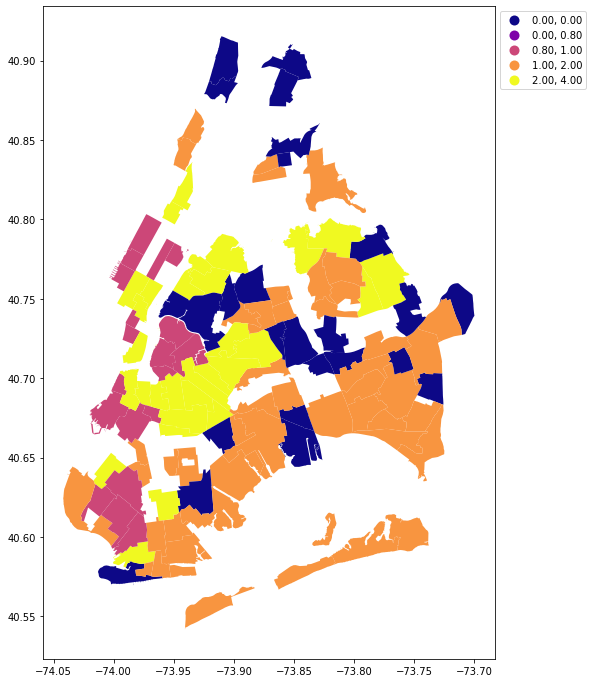

In [14]:
df.plot(column = 'Cluster', k=10, scheme='Quantiles',
         cmap='plasma', markersize=0.01, figsize=(12,12), legend=True,
         missing_kwds={"color": "lightgrey", "edgecolor": "blue",
                       "hatch": "///", "label": "Missing values"},
         legend_kwds={'bbox_to_anchor': (1, 1), 'loc': 'upper left'})

plt.show()

In [37]:
df1 = pd.read_csv('/Users/ananyarajesh/Downloads/applied_data_science_final_project-main 5/Data/gentrification.csv')

In [38]:
gen = df1.loc[:, ['ntacode', 'gentrification']]

In [39]:
gen = pd.merge(nta, gen, on='ntacode', how='inner')

In [40]:
gen

,boro_code,boro_name,county_fips,ntacode,ntaname,shape_leng,shape_area,geometry,gentrification
0,4,Queens,081,QN08,St. Albans,45401.316803,77412747.847,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...",1
1,4,Queens,081,QN55,South Ozone Park,36708.1693055,82461393.7368,"MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ...",1
2,3,Brooklyn,047,BK40,Windsor Terrace,19033.6720656,14041667.99,"MULTIPOLYGON (((-73.98017 40.66115, -73.98021 ...",0
3,3,Brooklyn,047,BK50,Canarsie,43703.6096661,82089678.6389,"MULTIPOLYGON (((-73.88834 40.64671, -73.88835 ...",0
4,4,Queens,081,QN26,North Corona,18429.5400774,18003888.327,"MULTIPOLYGON (((-73.85450 40.75828, -73.85421 ...",1
...,...,...,...,...,...,...,...,...,...
115,1,Manhattan,061,MN28,Lower East Side,26518.5122812,23299597.1538,"MULTIPOLYGON (((-73.98237 40.70554, -73.98246 ...",0
116,3,Brooklyn,047,BK35,Stuyvesant Heights,28239.0853295,31407114.0944,"MULTIPOLYGON (((-73.91741 40.68403, -73.91727 ...",0
117,3,Brooklyn,047,BK78,Bushwick South,40735.7458884,40169273.8854,"MULTIPOLYGON (((-73.93230 40.70775, -73.93392 ...",0
118,3,Brooklyn,047,BK83,Cypress Hills-City Line,35564.0581876,27609541.0302,"MULTIPOLYGON (((-73.86335 40.67935, -73.86331 ...",0


In [41]:
mapping = {0: 'Will not gentrify', 1: 'Will gentrify'}
gen['gen'] = gen['gentrification'].map(mapping)

In [42]:
gen

,boro_code,boro_name,county_fips,ntacode,ntaname,shape_leng,shape_area,geometry,gentrification,gen
0,4,Queens,081,QN08,St. Albans,45401.316803,77412747.847,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...",1,Will gentrify
1,4,Queens,081,QN55,South Ozone Park,36708.1693055,82461393.7368,"MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ...",1,Will gentrify
2,3,Brooklyn,047,BK40,Windsor Terrace,19033.6720656,14041667.99,"MULTIPOLYGON (((-73.98017 40.66115, -73.98021 ...",0,Will not gentrify
3,3,Brooklyn,047,BK50,Canarsie,43703.6096661,82089678.6389,"MULTIPOLYGON (((-73.88834 40.64671, -73.88835 ...",0,Will not gentrify
4,4,Queens,081,QN26,North Corona,18429.5400774,18003888.327,"MULTIPOLYGON (((-73.85450 40.75828, -73.85421 ...",1,Will gentrify
...,...,...,...,...,...,...,...,...,...,...
115,1,Manhattan,061,MN28,Lower East Side,26518.5122812,23299597.1538,"MULTIPOLYGON (((-73.98237 40.70554, -73.98246 ...",0,Will not gentrify
116,3,Brooklyn,047,BK35,Stuyvesant Heights,28239.0853295,31407114.0944,"MULTIPOLYGON (((-73.91741 40.68403, -73.91727 ...",0,Will not gentrify
117,3,Brooklyn,047,BK78,Bushwick South,40735.7458884,40169273.8854,"MULTIPOLYGON (((-73.93230 40.70775, -73.93392 ...",0,Will not gentrify
118,3,Brooklyn,047,BK83,Cypress Hills-City Line,35564.0581876,27609541.0302,"MULTIPOLYGON (((-73.86335 40.67935, -73.86331 ...",0,Will not gentrify


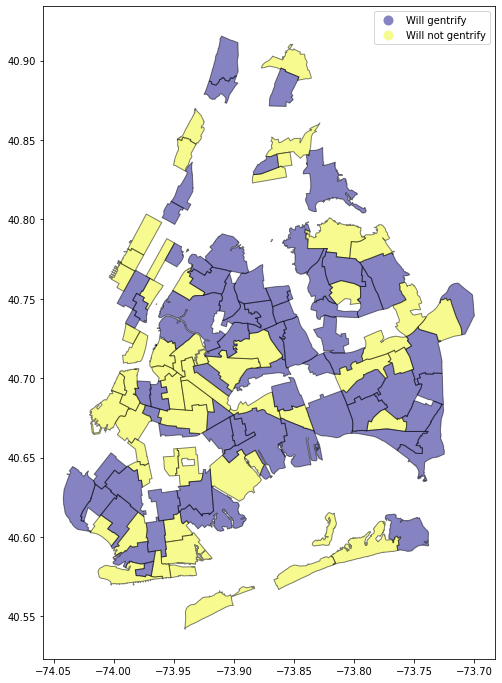

In [108]:
ax = gen.plot(column='gen', cmap='plasma', figsize=(12, 12), alpha=0.5, edgecolor='k', legend=True)
ax.set_axis_on()